In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

In [93]:
df1=pd.read_csv('absortion.csv')
df2 = pd.read_csv('absorption.txt')
df= pd.concat([df1, df2], axis=1)
df.drop('target', axis=1, inplace=True)

In [94]:
def extract_mutation_info(name):
    matches = re.findall(r'([A-Z])(\d+)([A-Z]+)', name)
    if matches:
        origins, positions, mutations = [], [], []
        for match in matches:
            origin, position, mutation = match
            origins.append(origin)
            positions.append(int(position))
            mutations.append(mutation)
        return origins, positions, mutations
    else:
        return None, None, None
df['origin'], df['position'], df['mutation'] = zip(*df['name'].apply(extract_mutation_info))

In [95]:
category=[]
for i in range(len(df)):
    value_check=df["peak"][i]

    if value_check>=539:
        category.append("1")
    else:
        category.append("0")
df["cat"]=category
df

,id,sequence,name,sequence,peak,is_train,m,origin,position,mutation,cat
0,sequence_40826,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,parent,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,539,True,0,None,None,None,1
1,sequence_40787,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,W122A,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,510,True,1,[W],[122],[A],0
2,sequence_40789,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,W122G,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,510,True,1,[W],[122],[G],0
3,sequence_40794,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,W122R,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,519,True,1,[W],[122],[R],0
4,sequence_40806,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,V126A,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,525,True,1,[V],[126],[A],0
...,...,...,...,...,...,...,...,...,...,...,...
76,sequence_40795,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,T125C/W222M,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,562,True,2,"[T, W]","[125, 222]","[C, M]",1
77,sequence_40866,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,D121E/T125C/A256M,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,620,False,3,"[D, T, A]","[121, 125, 256]","[E, C, M]",1
78,sequence_40799,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,T125C/F185T/A256M,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,597,False,3,"[T, F, A]","[125, 185, 256]","[C, T, M]",1
79,sequence_40788,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,W122G/T125C/A256M,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,510,False,3,"[W, T, A]","[122, 125, 256]","[G, C, M]",0


In [96]:
df["cat"].value_counts()

cat
0    50
1    31
Name: count, dtype: int64

In [97]:
df_positive=df.loc[df["cat"]=="1"]
df_negative=df.loc[df["cat"]=="0"]
df_positive=df_positive.sort_values(by="peak",ascending=True)
df_negative=df_negative.sort_values(by="peak",ascending=True)
df_negative=df_negative.reset_index(drop=True)
df_positive=df_positive.reset_index(drop=True)

In [98]:
df_positive.head()

,id,sequence,name,sequence,peak,is_train,m,origin,position,mutation,cat
0,sequence_40826,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,parent,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,539,True,0,None,None,None,1
1,sequence_40820,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,W222L,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,543,True,1,[W],[222],[L],1
2,sequence_40837,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,F185W,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,543,True,1,[F],[185],[W],1
3,sequence_40808,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,V126M,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,543,True,1,[V],[126],[M],1
4,sequence_40836,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,F185T,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,543,True,1,[F],[185],[T],1


In [99]:
df_origin_positive=[]

for i in range(len(df_positive["origin"])):
    if df_positive["origin"][i]!=None:
        for j in range(len(df_positive["origin"][i])):
            letter=df_positive["origin"][i][j]
            df_origin_positive.append(letter)
df_origin_positive=pd.DataFrame(df_origin_positive)
df_origin_positive.columns=["letter"]
df_origin_positive
df_origin_positive["letter"].value_counts()

letter
T    16
A     8
W     5
F     4
D     4
L     3
P     2
V     1
I     1
Y     1
Name: count, dtype: int64

In [100]:
df_origin_negative=[]

for i in range(len(df_negative["origin"])):
    if df_negative["origin"][i]!=None:
        for j in range(len(df_negative["origin"][i])):
            letter=df_negative["origin"][i][j]
            df_origin_negative.append(letter)
df_origin_negative=pd.DataFrame(df_origin_negative)
df_origin_negative.columns=["letter"]
df_origin_negative
df_origin_negative["letter"].value_counts()

letter
G    23
A    22
E    21
S     9
W     8
F     4
Y     4
M     3
V     3
L     2
T     1
Name: count, dtype: int64

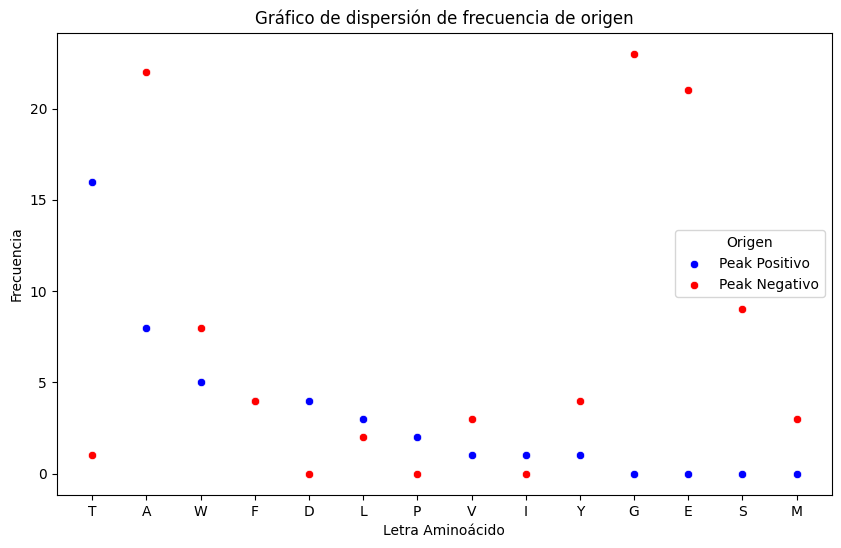

In [101]:
letter_frequencies_positive = df_origin_positive['letter'].value_counts().reset_index()
letter_frequencies_positive.columns = ['letter', 'frequency_positive']

letter_frequencies_negative = df_origin_negative['letter'].value_counts().reset_index()
letter_frequencies_negative.columns = ['letter', 'frequency_negative']

# Combinar las frecuencias de ambas categorías
letter_frequencies_combined = letter_frequencies_positive.merge(letter_frequencies_negative, on='letter', how='outer').fillna(0)

# Crear un gráfico de dispersión con colores diferentes para Positive y Negative
plt.figure(figsize=(10, 6))
sns.scatterplot(data=letter_frequencies_combined, x='letter', y='frequency_positive', color='blue', label='Peak Positivo')
sns.scatterplot(data=letter_frequencies_combined, x='letter', y='frequency_negative', color='red', label='Peak Negativo')
plt.xlabel("Letra Aminoácido")
plt.ylabel("Frecuencia")
plt.title("Gráfico de dispersión de frecuencia de origen")
plt.legend(title="Origen")
plt.show()


In [102]:
df_mutation_positive=[]

for i in range(len(df_positive["mutation"])):
    if df_positive["mutation"][i]!=None:
        for j in range(len(df_positive["mutation"][i])):
            letter=df_positive["mutation"][i][j]
            df_mutation_positive.append(letter)
df_mutation_positive=pd.DataFrame(df_mutation_positive)
df_mutation_positive.columns=["letter"]
df_mutation_positive
df_mutation_positive["letter"].value_counts()

letter
M    13
C     7
T     4
V     4
W     3
E     3
D     3
L     2
S     1
I     1
A     1
G     1
K     1
N     1
Name: count, dtype: int64

In [103]:
df_mutation_negative=[]

for i in range(len(df_negative["mutation"])):
    if df_negative["mutation"][i]!=None:
        for j in range(len(df_negative["mutation"][i])):
            letter=df_negative["mutation"][i][j]
            df_mutation_negative.append(letter)
df_mutation_negative=pd.DataFrame(df_mutation_negative)
df_mutation_negative.columns=["letter"]
df_mutation_negative
df_mutation_negative["letter"].value_counts()

letter
S    20
L    18
W    18
G    15
A     6
C     6
T     5
M     4
V     2
D     2
P     2
R     1
Q     1
Name: count, dtype: int64

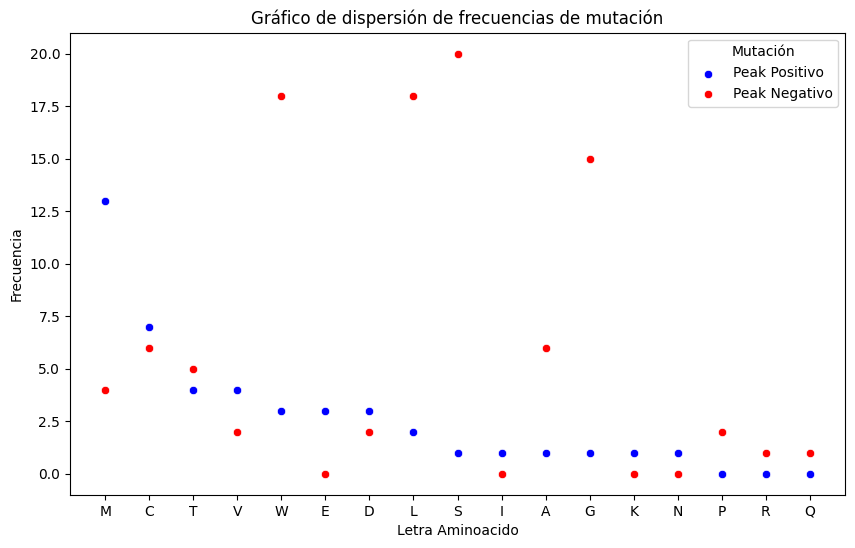

In [104]:
letter_frequencies_positive = df_mutation_positive['letter'].value_counts().reset_index()
letter_frequencies_positive.columns = ['letter', 'frequency_positive']

letter_frequencies_negative = df_mutation_negative['letter'].value_counts().reset_index()
letter_frequencies_negative.columns = ['letter', 'frequency_negative']

# Combinar las frecuencias de ambas categorías
letter_frequencies_combined = letter_frequencies_positive.merge(letter_frequencies_negative, on='letter', how='outer').fillna(0)

# Crear un gráfico de dispersión con colores diferentes para Positive y Negative
plt.figure(figsize=(10, 6))
sns.scatterplot(data=letter_frequencies_combined, x='letter', y='frequency_positive', color='blue', label='Peak Positivo')
sns.scatterplot(data=letter_frequencies_combined, x='letter', y='frequency_negative', color='red', label='Peak Negativo')
plt.xlabel("Letra Aminoacidos")
plt.ylabel("Frecuencia")
plt.title("Gráfico de dispersión de frecuencias de mutación")
plt.legend(title="Mutación")
plt.show()

In [105]:
df_position_positive=[]

for i in range(len(df_positive["position"])):
    if df_positive["position"][i]!=None:
        for j in range(len(df_positive["position"][i])):
            pos=df_positive["position"][i][j]
            df_position_positive.append(pos)
df_position_positive=pd.DataFrame(df_position_positive)
df_position_positive.columns=["position"]
df_position_positive
df_position_positive["position"].value_counts()

position
125    16
256     8
222     5
185     4
129     3
226     2
253     2
121     2
126     1
159     1
225     1
Name: count, dtype: int64

In [106]:
df_position_negative=[]

for i in range(len(df_negative["position"])):
    if df_negative["position"][i]!=None:
        for j in range(len(df_negative["position"][i])):
            pos=df_negative["position"][i][j]
            df_position_negative.append(pos)
df_position_negative=pd.DataFrame(df_position_negative)
df_position_negative.columns=["position"]
df_position_negative
df_position_negative["position"].value_counts()

position
256    22
166    21
162    20
181     9
122     8
185     4
229     4
158     3
178     3
126     3
129     2
125     1
Name: count, dtype: int64

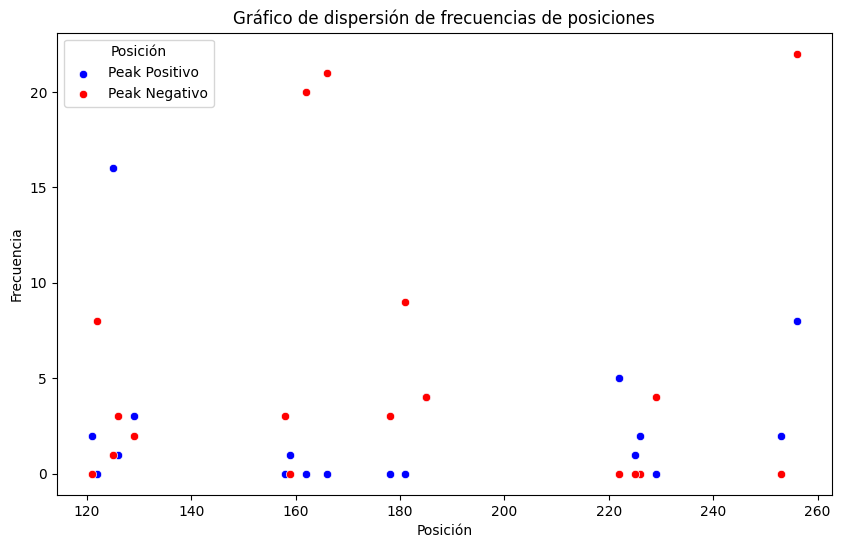

In [109]:
frequencies_positive = df_position_positive['position'].value_counts().reset_index()
frequencies_positive.columns = ['position', 'frequency_positive']

frequencies_negative = df_position_negative['position'].value_counts().reset_index()
frequencies_negative.columns = ['position', 'frequency_negative']

# Combinar las frecuencias de ambas categorías
frequencies_combined = frequencies_positive.merge(frequencies_negative, on='position', how='outer').fillna(0)

# Crear un gráfico de dispersión con colores diferentes para Positive y Negative
plt.figure(figsize=(10, 6))
sns.scatterplot(data=frequencies_combined, x='position', y='frequency_positive', color='blue', label='Peak Positivo')
sns.scatterplot(data=frequencies_combined, x='position', y='frequency_negative', color='red', label='Peak Negativo')
plt.xlabel("Posición")
plt.ylabel("Frecuencia")
plt.title("Gráfico de dispersión de frecuencias de posiciones")
plt.legend(title="Posición")
plt.show()